## Importing the Datasets

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score , recall_score , f1_score

In [2]:
# Importing the raw data containing only the (BVP,TEMP and HR) for all nurses 

df = pd.read_csv("E:\Large\doi_10.5061_dryad.5hqbzkh6f__v6_2\merged_data_labeled\Labelled_dataset.csv")


C:\Users\Home\AppData\Local\Temp\ipykernel_28688\4247768560.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("E:\Large\doi_10.5061_dryad.5hqbzkh6f__v6_2\merged_data_labeled\Labelled_dataset.csv")


In [3]:
df.shape

(11509051, 9)

In [4]:
# This function is use to preview the dataset showing the top five data.
df.head()

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0


In [5]:
# The describe function shows 
df.describe(include ='all')

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
count,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,11509051,11509051,1.150905e+07
unique,NaN,NaN,NaN,NaN,NaN,NaN,18,10628304,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,E4,2020-06-23 18:53:15.062500096,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,1487871,4,NaN
mean,-2.823775e+01,-9.091032e-01,2.382449e+01,3.502127e+00,8.576090e+01,3.223435e+01,NaN,NaN,1.554202e+00
std,3.142310e+01,3.343382e+01,2.985317e+01,5.656541e+00,1.419642e+01,2.260516e+00,NaN,NaN,7.891827e-01
min,-1.280000e+02,-1.280000e+02,-1.280000e+02,0.000000e+00,5.100000e+01,2.409000e+01,NaN,NaN,0.000000e+00
25%,-5.200000e+01,-1.900000e+01,4.000000e+00,2.242060e-01,7.672000e+01,3.019000e+01,NaN,NaN,1.000000e+00
50%,-3.300000e+01,1.000000e+00,2.500000e+01,1.157407e+00,8.390000e+01,3.257000e+01,NaN,NaN,2.000000e+00
75%,-1.400000e+01,1.700000e+01,4.900000e+01,4.077436e+00,9.310000e+01,3.425000e+01,NaN,NaN,2.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11509051 entries, 0 to 11509050
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   EDA       float64
 4   HR        float64
 5   TEMP      float64
 6   id        object 
 7   datetime  object 
 8   label     float64
dtypes: float64(7), object(2)
memory usage: 790.3+ MB


In [7]:
## Checking if any of the column contains 
df.isnull().sum()

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64

In [8]:
df.columns

Index(['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP', 'id', 'datetime', 'label'], dtype='object')

In [9]:
df.drop(['X' ,'Y' ,'Z','datetime'] , axis =1 ,inplace = True)

In [10]:
df.columns

Index(['EDA', 'HR', 'TEMP', 'id', 'label'], dtype='object')

In [11]:
# This code is use to categorize the label column and create a new column called 'Stress_Level'. The stress level will
# clearly show category of each stress the nurses faced during a period of time.

df['Stress_level'] = df['label'].map(lambda x: "High_stress" if x == 2 else "Medium_stress" if x == 1 else "No_stress")

In [12]:
df.head()

,EDA,HR,TEMP,id,label,Stress_level
0,6.769995,99.43,31.17,15,2.0,High_stress
1,6.769995,99.43,31.17,15,2.0,High_stress
2,6.769995,99.43,31.17,15,2.0,High_stress
3,6.769995,99.43,31.17,15,2.0,High_stress
4,6.769995,99.43,31.17,15,2.0,High_stress


Figure 1


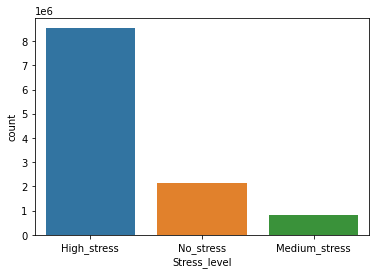

In [13]:
sns.countplot(df['Stress_level'])
print('Figure 1')

* The above countplot was able to count all nurses activity tagging each to the stress level encountered. From the result above, it shows the nurses encounter more stress. The high stress is ranked higher, compare to no stress and medium stress respectively.

In [14]:
#Converting the id column to string to ensure all id corresponds

df = df.astype({'id':'string'})

In [15]:
#Assigning nurses with high stress to a dataframe

dfHS = df[df['Stress_level'] == 'High_stress']

In [16]:
#Assigning nurses with no stress to a dataframe

dfNS = df[df['Stress_level'] == 'No_stress']

<AxesSubplot:xlabel='TEMP', ylabel='Density'>

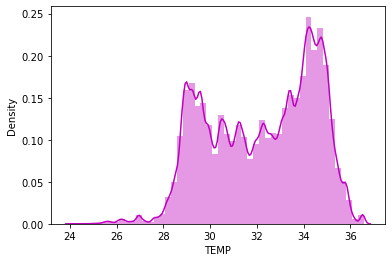

In [17]:
#Plotting a density graph of Temperature for all nurses

sns.distplot(df['TEMP'] ,color ='m')

<AxesSubplot:xlabel='TEMP', ylabel='Density'>

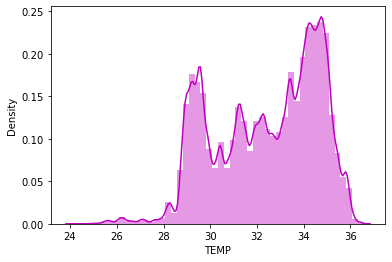

In [17]:
#Plotting a density graph of temperature for high stressed nurses

sns.distplot(dfHS['TEMP'] ,color ='m')

<AxesSubplot:xlabel='TEMP', ylabel='Density'>

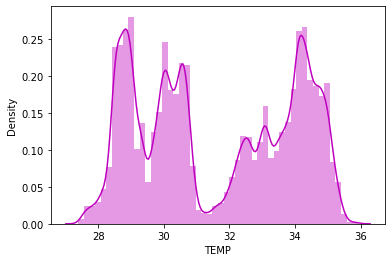

In [21]:
#Plotting a density graph of temperature for no stressed nurses

sns.distplot(dfNS['TEMP'] ,color ='m')

<AxesSubplot:xlabel='HR', ylabel='Density'>

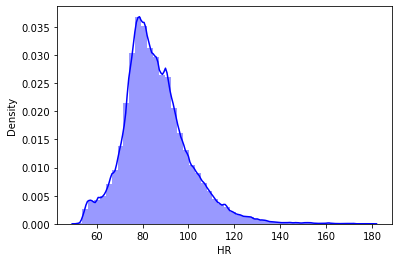

In [19]:
#Plotting a density graph of Heart Rate for all nurses

sns.distplot(df['HR'] ,color ='b')

<AxesSubplot:xlabel='HR', ylabel='Density'>

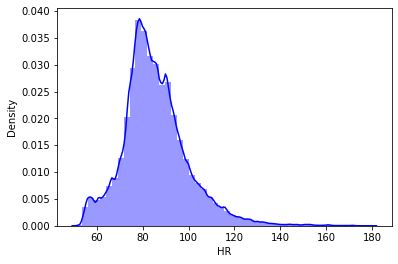

In [18]:
#Plotting a density graph of Heart Rate for high stressed nurses

sns.distplot(dfHS['HR'] ,color ='b')

<AxesSubplot:xlabel='HR', ylabel='Density'>

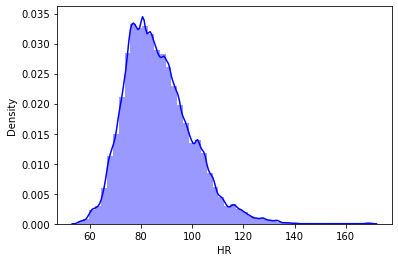

In [20]:
#Plotting a density graph of Heart Rate for no stressed nurses

sns.distplot(dfNS['HR'] ,color ='b')

<AxesSubplot:xlabel='EDA', ylabel='Density'>

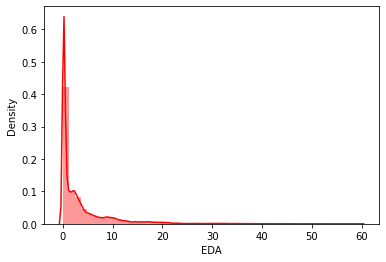

In [21]:
#Plotting a density graph of EDA for all nurses

sns.distplot(df['EDA'] ,color ='r')

<AxesSubplot:xlabel='EDA', ylabel='Density'>

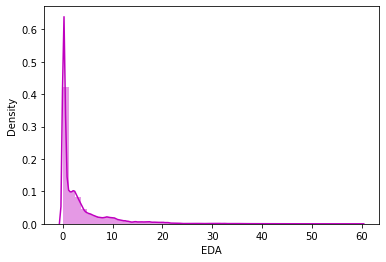

In [22]:
#Plotting a density graph of EDA for all nurses


sns.distplot(df['EDA'] ,color ='m')

<AxesSubplot:xlabel='EDA', ylabel='Density'>

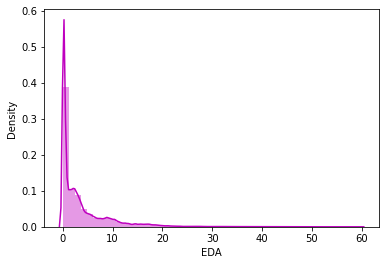

In [23]:
#Plotting a density graph of EDA for high stressed nurses

sns.distplot(dfHS['EDA'] ,color ='m')

<AxesSubplot:xlabel='EDA', ylabel='Density'>

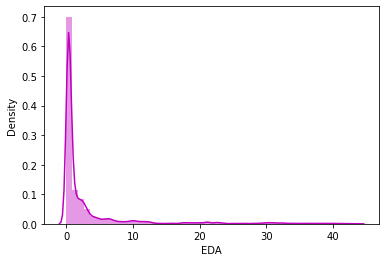

In [24]:
#Plotting a density graph of EDA for no stressed nurses

sns.distplot(dfNS['EDA'] ,color ='m')

E4    1487871
7A    1377342
83    1372819
DF     908168
5C     865930
6B     825549
CE     814087
BG     608655
6D     591363
94     586096
EG     549124
F5     535706
8B     423763
15     309131
7E     253447
Name: id, dtype: Int64
Figure 2


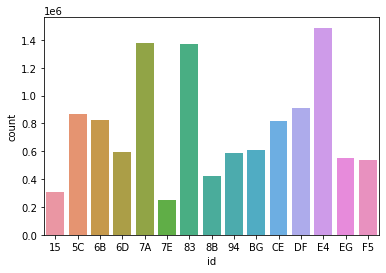

In [17]:
print(df['id'].value_counts())
sns.countplot(df['id'])
print("Figure 2")

* The above graph explores all nurses id and there respective contribution to the database, from the result above, nurse id EA, 74 and 83 contributed more to the dataset and would have more impact in the result of the analysis. This shows that the three nurses had more work session that others and have the EA wristband longer to collect more signal information. Unlike the nurse id 7E, 15 and 8B which have the least contribution to the entire dataset.

Figure 3


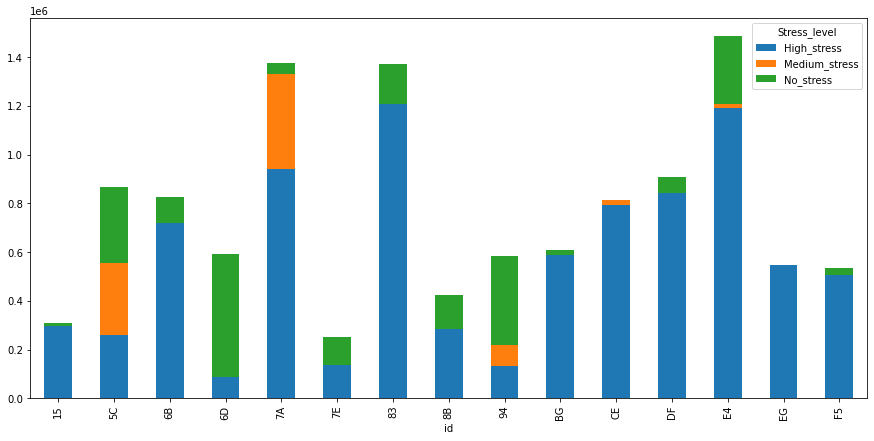

In [18]:
# Plotting the id of the nurses against their stress level.

df_show = df.groupby(['id', 'Stress_level'])['id'].count().unstack('Stress_level').fillna(0)
df_show[['High_stress','Medium_stress','No_stress']].plot(kind='bar', stacked=True, figsize=(15, 7))
print('Figure 3')

* The above stacked chart shows each nurses in relation to their stress level, the result supports Figure 2. Which depict that all nurses experiences stress during their work session. 83, E4 and 7A experience more stress.

In [19]:
print('Minimum')
minn = df['TEMP'].min()
print(minn)
print('Maximum')
maxx = df['TEMP'].max()
print(maxx)

Minimum
24.09
Maximum
36.59


In [20]:
print('Minimum')
minn = df['HR'].min()
print(minn)
print('Maximum')
maxx = df['HR'].max()
print(maxx)

Minimum
51.0
Maximum
180.23


In [22]:
print('Minimum')
minn = df['EDA'].min()
print(minn)
print('Maximum')
maxx = df['EDA'].max()
print(maxx)

Minimum
0.0
Maximum
59.760712


In [31]:
df_model = df.sample(frac = 0.01)

In [32]:
df.columns

Index(['EDA', 'HR', 'TEMP', 'id', 'label', 'Stress_level'], dtype='object')

In [43]:
df_model.shape

(107078, 5)

In [36]:
df_model.drop(['id'] , axis =1 ,inplace = True)

In [44]:
df_model = df_model.loc[df_model['Stress_level'].isin(["High_stress", "No_stress"])]

In [51]:
df_model.drop(['Stress_level'] , axis =1 ,inplace = True)

In [52]:
x = df_model.drop('label' , axis =1)
y = df_model['label']

print(df_model.shape ,x.shape , y.shape)

(107078, 4) (107078, 3) (107078,)


In [53]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 30)

print(x_train.shape , x_test.shape , y_train.shape , y_test.shape )

(74954, 3) (32124, 3) (74954,) (32124,)


In [54]:
df_model.head()

,EDA,HR,TEMP,label
1891877,13.824888,68.02,32.13,2.0
4748589,4.351925,68.85,33.55,2.0
2732776,3.502562,73.25,33.79,2.0
5120857,2.045808,134.22,34.11,2.0
3958469,0.806439,100.75,31.31,2.0


In [59]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train , y_train)

ytest_pred = svm.predict(x_test)

#finding different scores
acc = accuracy_score(y_test ,ytest_pred)

print('SUPPORT VECTOR MACHINE ACCURACY : ',acc)


SUPPORT VECTOR MACHINE ACCURACY :  0.7980326235836135


In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train , y_train)

ytest_pred = rf.predict(x_test)

#finding different scores
acc = accuracy_score(y_test ,ytest_pred)

print('RANDOM FOREST  CLASSIFIER ACCURACY : ',acc)


RANDOM FOREST  CLASSIFIER ACCURACY :  0.9488233096750094
